# Análisis Exploratorio de Datos para captar diabetes en una persona
En este proyecto usaremos el [dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data) para en primer lugar hacer un **análisis exploratorio de datos, limpieza y normalización** para posteriormente crear un modelo de clasificación multiclase que prediga si una persona padece, puede padecer, o no diabetes según los datos introducidos.

## Importamos el dataset e imprimimos información sobre el mismo

In [7]:
import pandas as pd

df = pd.read_csv('../database/diabetes-db.csv')

# MOSTRAMOS LAS COLUMNAS Y 5 FILAS DEL DATASET
print("Mostramos las columnas y primeras 5 filas del dataset:")
df.head()

Mostramos las columnas y primeras 5 filas del dataset:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
# IMPRIMIMOS ESTADÍSTICAS DESCRIPTIVAS DE LAS COLUMNAS
print("Imprimimos estadísticas descriptivas de las columnas:")
df.describe().T

Imprimimos estadísticas descriptivas de las columnas:


,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


### 📘 Diccionario de Variables – CDC Diabetes Health Indicators

Esta tabla resume el significado de cada variable presente en el dataset `diabetes-db.csv`, incluyendo su tipo, valores posibles y una breve descripción.

| Variable               | Tipo        | Valores posibles            | Descripción |
|------------------------|-------------|------------------------------|-------------|
| **HighBP**             | Categórica  | 1 = Sí, 0 = No               | ¿Tiene presión arterial alta? |
| **HighChol**           | Categórica  | 1 = Sí, 0 = No               | ¿Tiene el colesterol alto? |
| **CholCheck**          | Categórica  | 1 = Sí, 0 = No               | ¿Se ha hecho una revisión de colesterol en los últimos 5 años? |
| **BMI**                | Numérica    | Enteros entre 12 y 98        | Índice de masa corporal |
| **Smoker**             | Categórica  | 1 = Sí, 0 = No               | ¿Ha fumado al menos 100 cigarrillos en su vida? |
| **Stroke**             | Categórica  | 1 = Sí, 0 = No               | ¿Ha sufrido un derrame cerebral? |
| **HeartDiseaseorAttack** | Categórica| 1 = Sí, 0 = No               | ¿Ha tenido un infarto o enfermedad cardíaca? |
| **PhysActivity**       | Categórica  | 1 = Sí, 0 = No               | ¿Ha hecho actividad física en los últimos 30 días (excepto trabajo)? |
| **Fruits**             | Categórica  | 1 = Sí, 0 = No               | ¿Come frutas 1 o más veces al día? |
| **Veggies**            | Categórica  | 1 = Sí, 0 = No               | ¿Come verduras 1 o más veces al día? |
| **HvyAlcoholConsump**  | Categórica  | 1 = Sí, 0 = No               | ¿Consume alcohol en exceso? (Hombres >14 / Mujeres >7 bebidas semanales) |
| **AnyHealthcare**      | Categórica  | 1 = Sí, 0 = No               | ¿Tiene seguro médico o cobertura sanitaria? |
| **NoDocbcCost**        | Categórica  | 1 = Sí, 0 = No               | ¿No fue al médico por razones económicas en los últimos 12 meses? |
| **GenHlth**            | Ordinal     | 1 = Excelente a 5 = Mala     | Percepción general de salud |
| **MentHlth**           | Numérica    | 0–30                         | Días con problemas de salud mental en los últimos 30 días |
| **PhysHlth**           | Numérica    | 0–30                         | Días con problemas de salud física en los últimos 30 días |
| **DiffWalk**           | Categórica  | 1 = Sí, 0 = No               | ¿Tiene dificultad para caminar o subir escaleras? |
| **Sex**                | Categórica  | 1 = Hombre, 0 = Mujer        | Sexo del encuestado |
| **Age**                | Ordinal     | 1–13                         | Grupo de edad (1 = 18-24, 13 = 80+) |
| **Education**          | Ordinal     | 1–6                          | Nivel educativo (1 = Ninguno, 6 = Universidad) |
| **Income**             | Ordinal     | 1–8                          | Rango de ingresos (1 = <10k, 8 = >75k USD anuales) |
| **Diabetes_012**       | Categórica  | 0 = No, 1 = Prediabetes, 2 = Diabetes | Variable objetivo (target) |

> Este diccionario nos servirá como referencia para interpretar gráficas, preparar el modelo y presentar resultados con claridad.

In [9]:
# IMPRIMIMOS RESÚMEN DEL DATASET Y SU CONTENIDO
print("Imprimimos resumen del dataset y su contenido:")
df.info()

Imprimimos resumen del dataset y su contenido:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHl

In [ ]:
# AVERIGUAMOS SI HAY DIPLUCADOS EN EL DATASET
duplicados = df.duplicated().sum()
print("Número de filas duplicadas = ", duplicados)

Número de filas duplicadas =  23899


In [17]:
# VERIFICAR DIMENSIONES DEL DATASET
print(f"\nDimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")

# VER NOMBRES DE LAS CCOLUMNAS
print("\nNombres de columnas:")
df.columns.tolist()


Dimensiones del dataset: 253680 filas x 22 columnas

Nombres de columnas:


['Diabetes_012',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [ ]:
# DISTRIBUCIÓN DE LAS CLASES
print("\nDistribución de clases (%):")
diabetes_dist = (df['Diabetes_012'].value_counts(normalize=True) * 100).round(2)
display(diabetes_dist)


Distribución de clases (%):


Diabetes_012
0.0    84.24
2.0    13.93
1.0     1.83
Name: proportion, dtype: float64

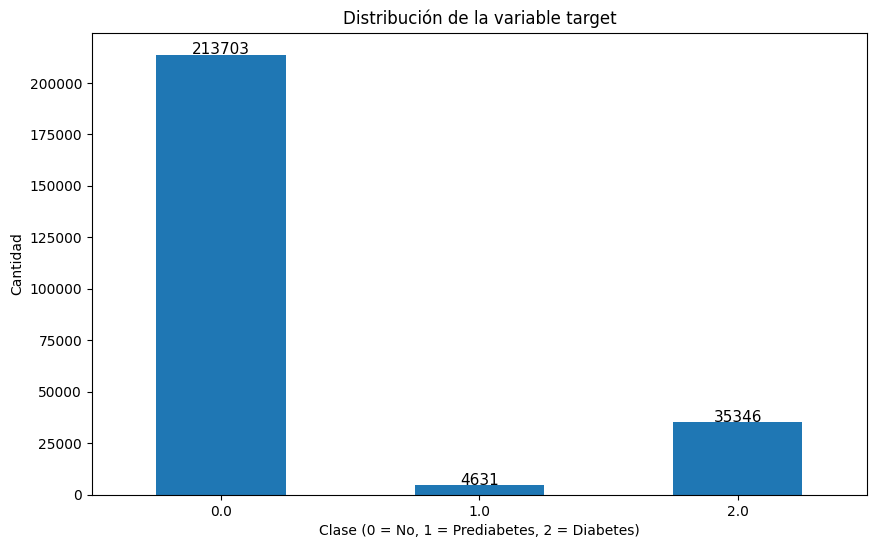

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)

# GRAFICAMOS LA DISTRIBUCIÓN DE LAS CLASES
counts = df['Diabetes_012'].value_counts().sort_index()

ax = counts.plot(kind='bar')
plt.title('Distribución de la variable target')
plt.xlabel('Clase (0 = No, 1 = Prediabetes, 2 = Diabetes)')
plt.ylabel('Cantidad')

# ROTAMOS ETIQUETAS DEL EJE X (POR DEFECTO ESTÁN EN VERTICAL SI SON LARGAS)
plt.xticks(rotation=0)

# AÑADIMOS ETIQUETAS SOBRE LAS BARRAS
for i, v in enumerate(counts):
    ax.text(i, v + 200, str(v), ha='center', fontsize=11)

plt.show()

Esta variable representa el estado de salud respecto a la diabetes y será el **objetivo de predicción** del modelo (clasificación multiclase).

- `0` → No diabetes  
- `1` → Prediabetes  
- `2` → Diabetes

###  ¿Por qué analizamos la distribución del target?

Antes de entrenar cualquier modelo, es fundamental conocer **cómo se distribuyen las clases** en la variable objetivo.  
Un modelo de clasificación puede aprender mal si una de las clases está muy poco representada (caso de "clase minoritaria").

### ¿Qué debemos observar?

- ¿Hay muchas más instancias de clase 0 (no diabetes)?  
  → Esto es un **desbalance típico** en datasets médicos.

- ¿La clase 1 (prediabetes) es muy escasa?  
  → El modelo podría **ignorarla por completo** al entrenar.

- ¿Clase 2 (diabetes) está bien representada?  
  → Cuanto más equilibradas estén las clases, **mejor capacidad de generalización** tendrá el modelo.



Podemos ver que el dataset está bastante limpio, no tiene valores nulos, todas las columnas están en el mismo tipo de dato. Hay 253680 instancias y 22 columnas. Procedemos al análisis exploratorio de datos 👇

## Análisis exploratorio de datos

### Análisis de la variable objetivo


--- Análisis del desbalance de clases ---
Proporción de desbalance (mayoría/minoría): 46.15:1


<Figure size 1200x600 with 0 Axes>

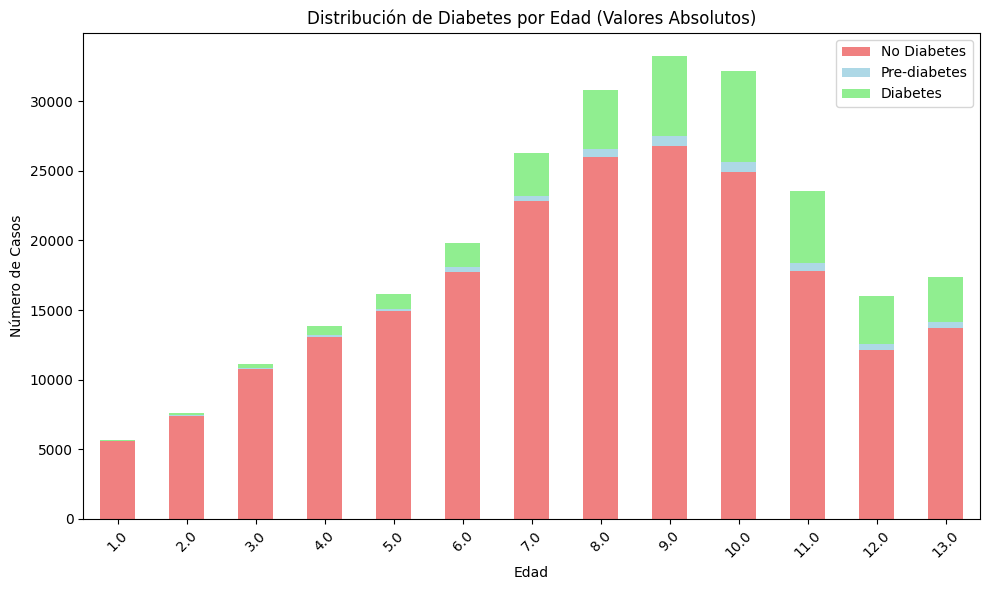

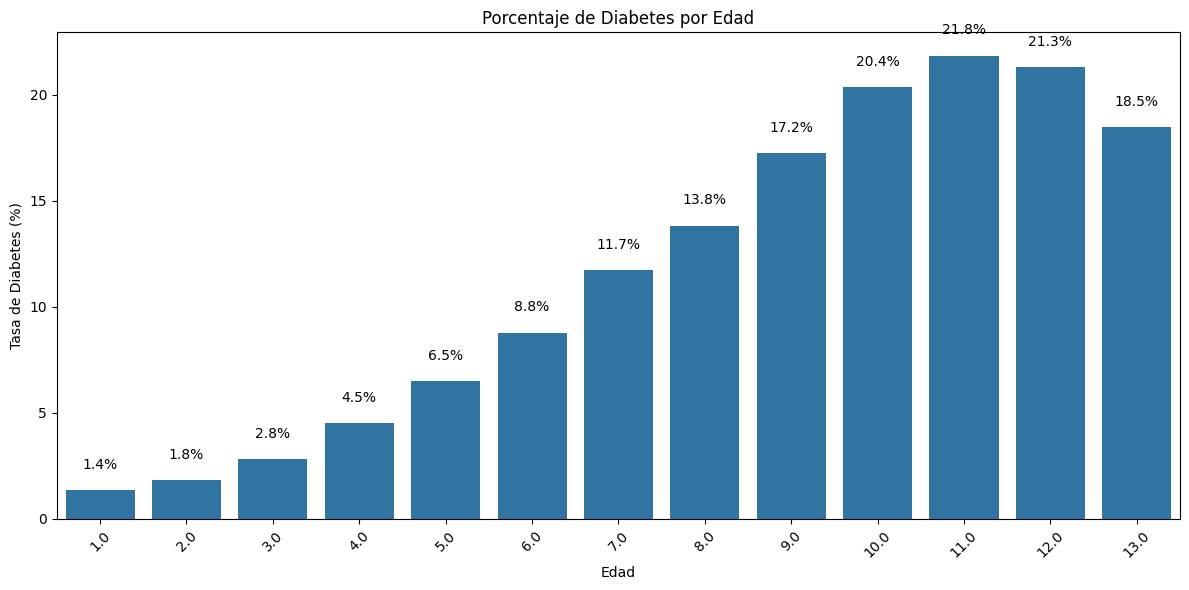

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# ANÁLISIS DEL DESBALANCE DE CLASES Y SUS IMPLICACIONES
print("\n--- Análisis del desbalance de clases ---")
class_sizes = df['Diabetes_012'].value_counts()
majority_class_size = class_sizes.max()
minority_class_size = class_sizes.min()
imbalance_ratio = majority_class_size / minority_class_size
print(f"Proporción de desbalance (mayoría/minoría): {imbalance_ratio:.2f}:1")

# VISUALIZAMOS DISTRIBUCIÓN POR EDAD PARA ENTENDER VARIACIÓN DEMOGRÁFICA
plt.figure(figsize=(12, 6))
age_dist = pd.crosstab(df['Age'], df['Diabetes_012'])
age_dist_pct = age_dist.div(age_dist.sum(axis=1), axis=0) * 100

# GRÁFICO DE BARRAS APILADAS PARA DISTRIBUCIÓN POR EDAD
age_dist.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Distribución de Diabetes por Edad (Valores Absolutos)')
plt.xlabel('Edad')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend(['No Diabetes', 'Pre-diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()

# MOSTRAMOS LOS PORCENTAJES DE DIABETES POR EDAD
plt.figure(figsize=(12, 6))
sns.barplot(x=age_dist_pct.index, y=age_dist_pct[2])  # Clase 2 (Diabetes)
plt.title('Porcentaje de Diabetes por Edad')
plt.xlabel('Edad')
plt.ylabel('Tasa de Diabetes (%)')
plt.xticks(rotation=45)
for i, v in enumerate(age_dist_pct[2]):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.tight_layout()
plt.show()

### Variables numéricas vs Diabetes_012

 Variables numéricas: ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
 Variables categóricas: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex']


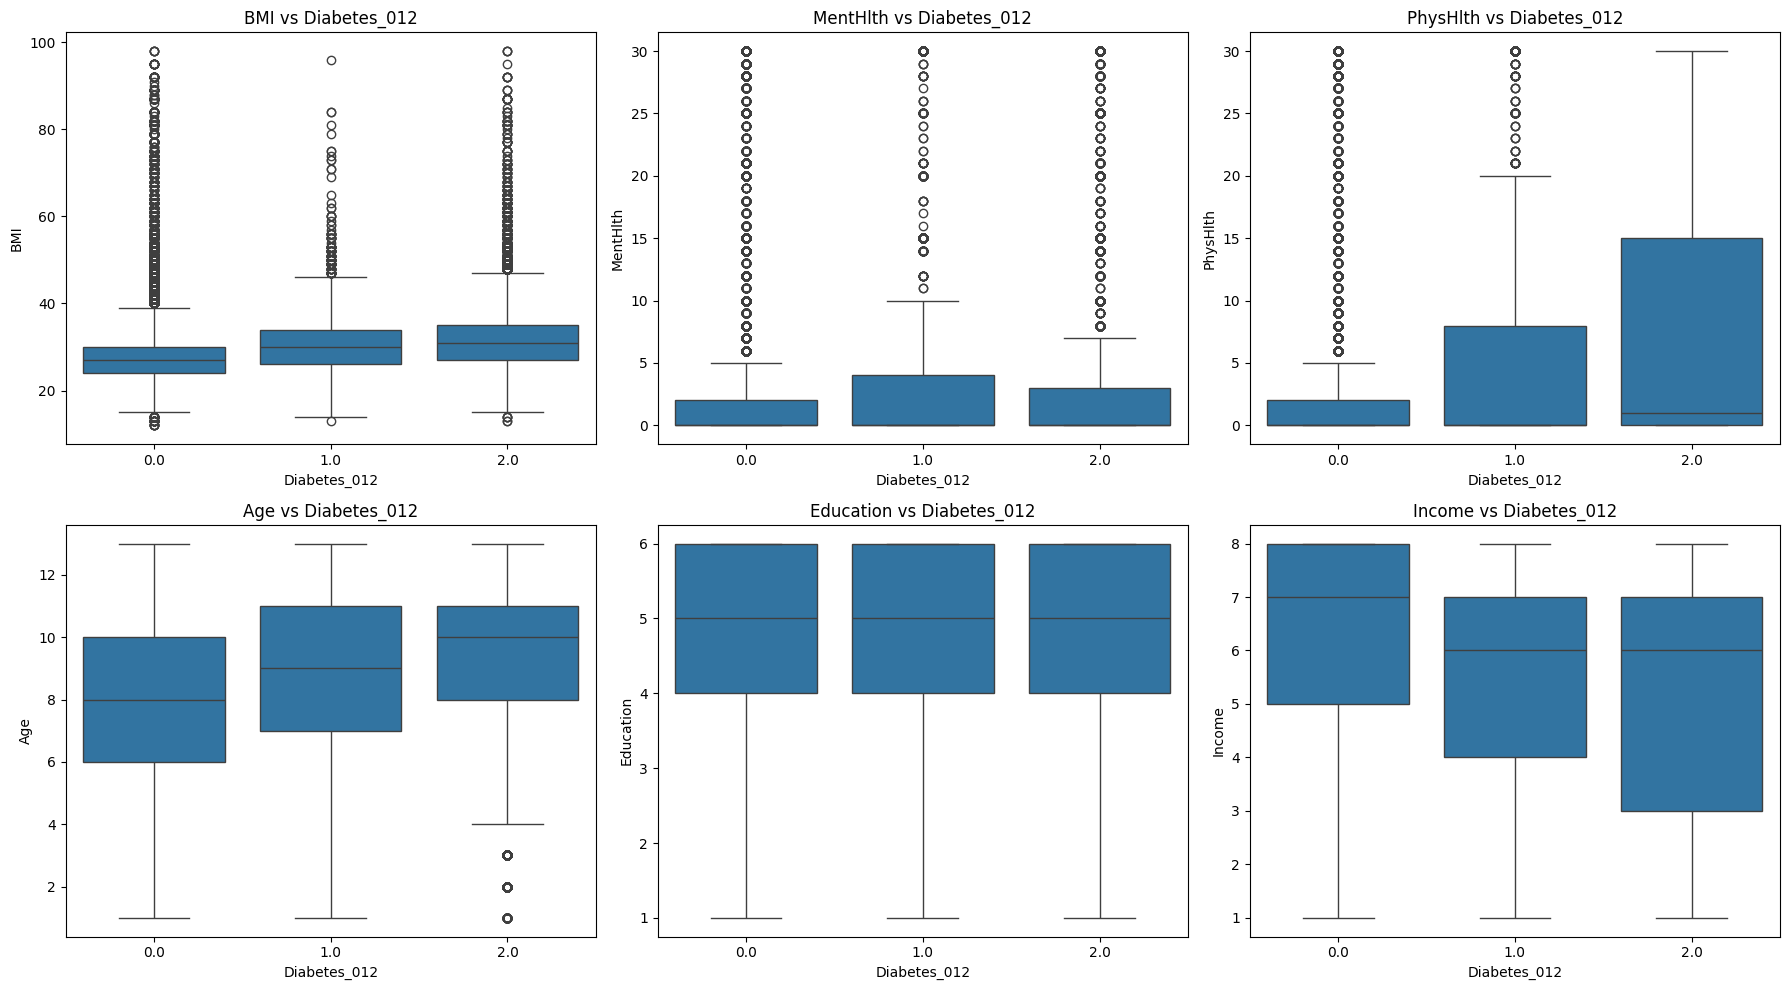

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Excluimos el target del análisis
features = df.drop(columns=['Diabetes_012'])

# Variables numéricas
numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Variables categóricas (solo si tienen pocos valores únicos)
categorical_cols = [col for col in numeric_cols if df[col].nunique() <= 5]
numeric_cols = [col for col in numeric_cols if col not in categorical_cols]

print(" Variables numéricas:", numeric_cols)
print(" Variables categóricas:", categorical_cols)

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='Diabetes_012', y=col, data=df)
    plt.title(f"{col} vs Diabetes_012")

plt.tight_layout()
plt.show()

#### Señales claras:

1. **BMI (Body Mass Index):**  
   Se observa un **aumento progresivo del IMC** desde clase 0 hasta clase 2.  
   ➤ Relación positiva entre sobrepeso y probabilidad de diabetes.

2. **MentHlth (Salud mental):**  
   Mayor dispersión en clases 1 y 2.  
   ➤ Posible relación débil, pero puede ser útil combinada con otras variables.

3. **PhysHlth (Salud física):**  
   Los pacientes con diabetes reportan más días con problemas físicos.  
   ➤ Puede ser **una variable predictiva importante**.

4. **Age (Edad):**  
   Las clases 1 y 2 tienden a pertenecer a grupos de mayor edad.  
   ➤ Edad correlaciona positivamente con el riesgo de diabetes.

5. **Education e Income:**  
   Se percibe una ligera tendencia inversa: menor nivel educativo y económico, mayor prevalencia de diabetes.  
   ➤ La situación socioeconómica podría ser un factor condicionante.

### Variables categóricas vs Diabetes_012

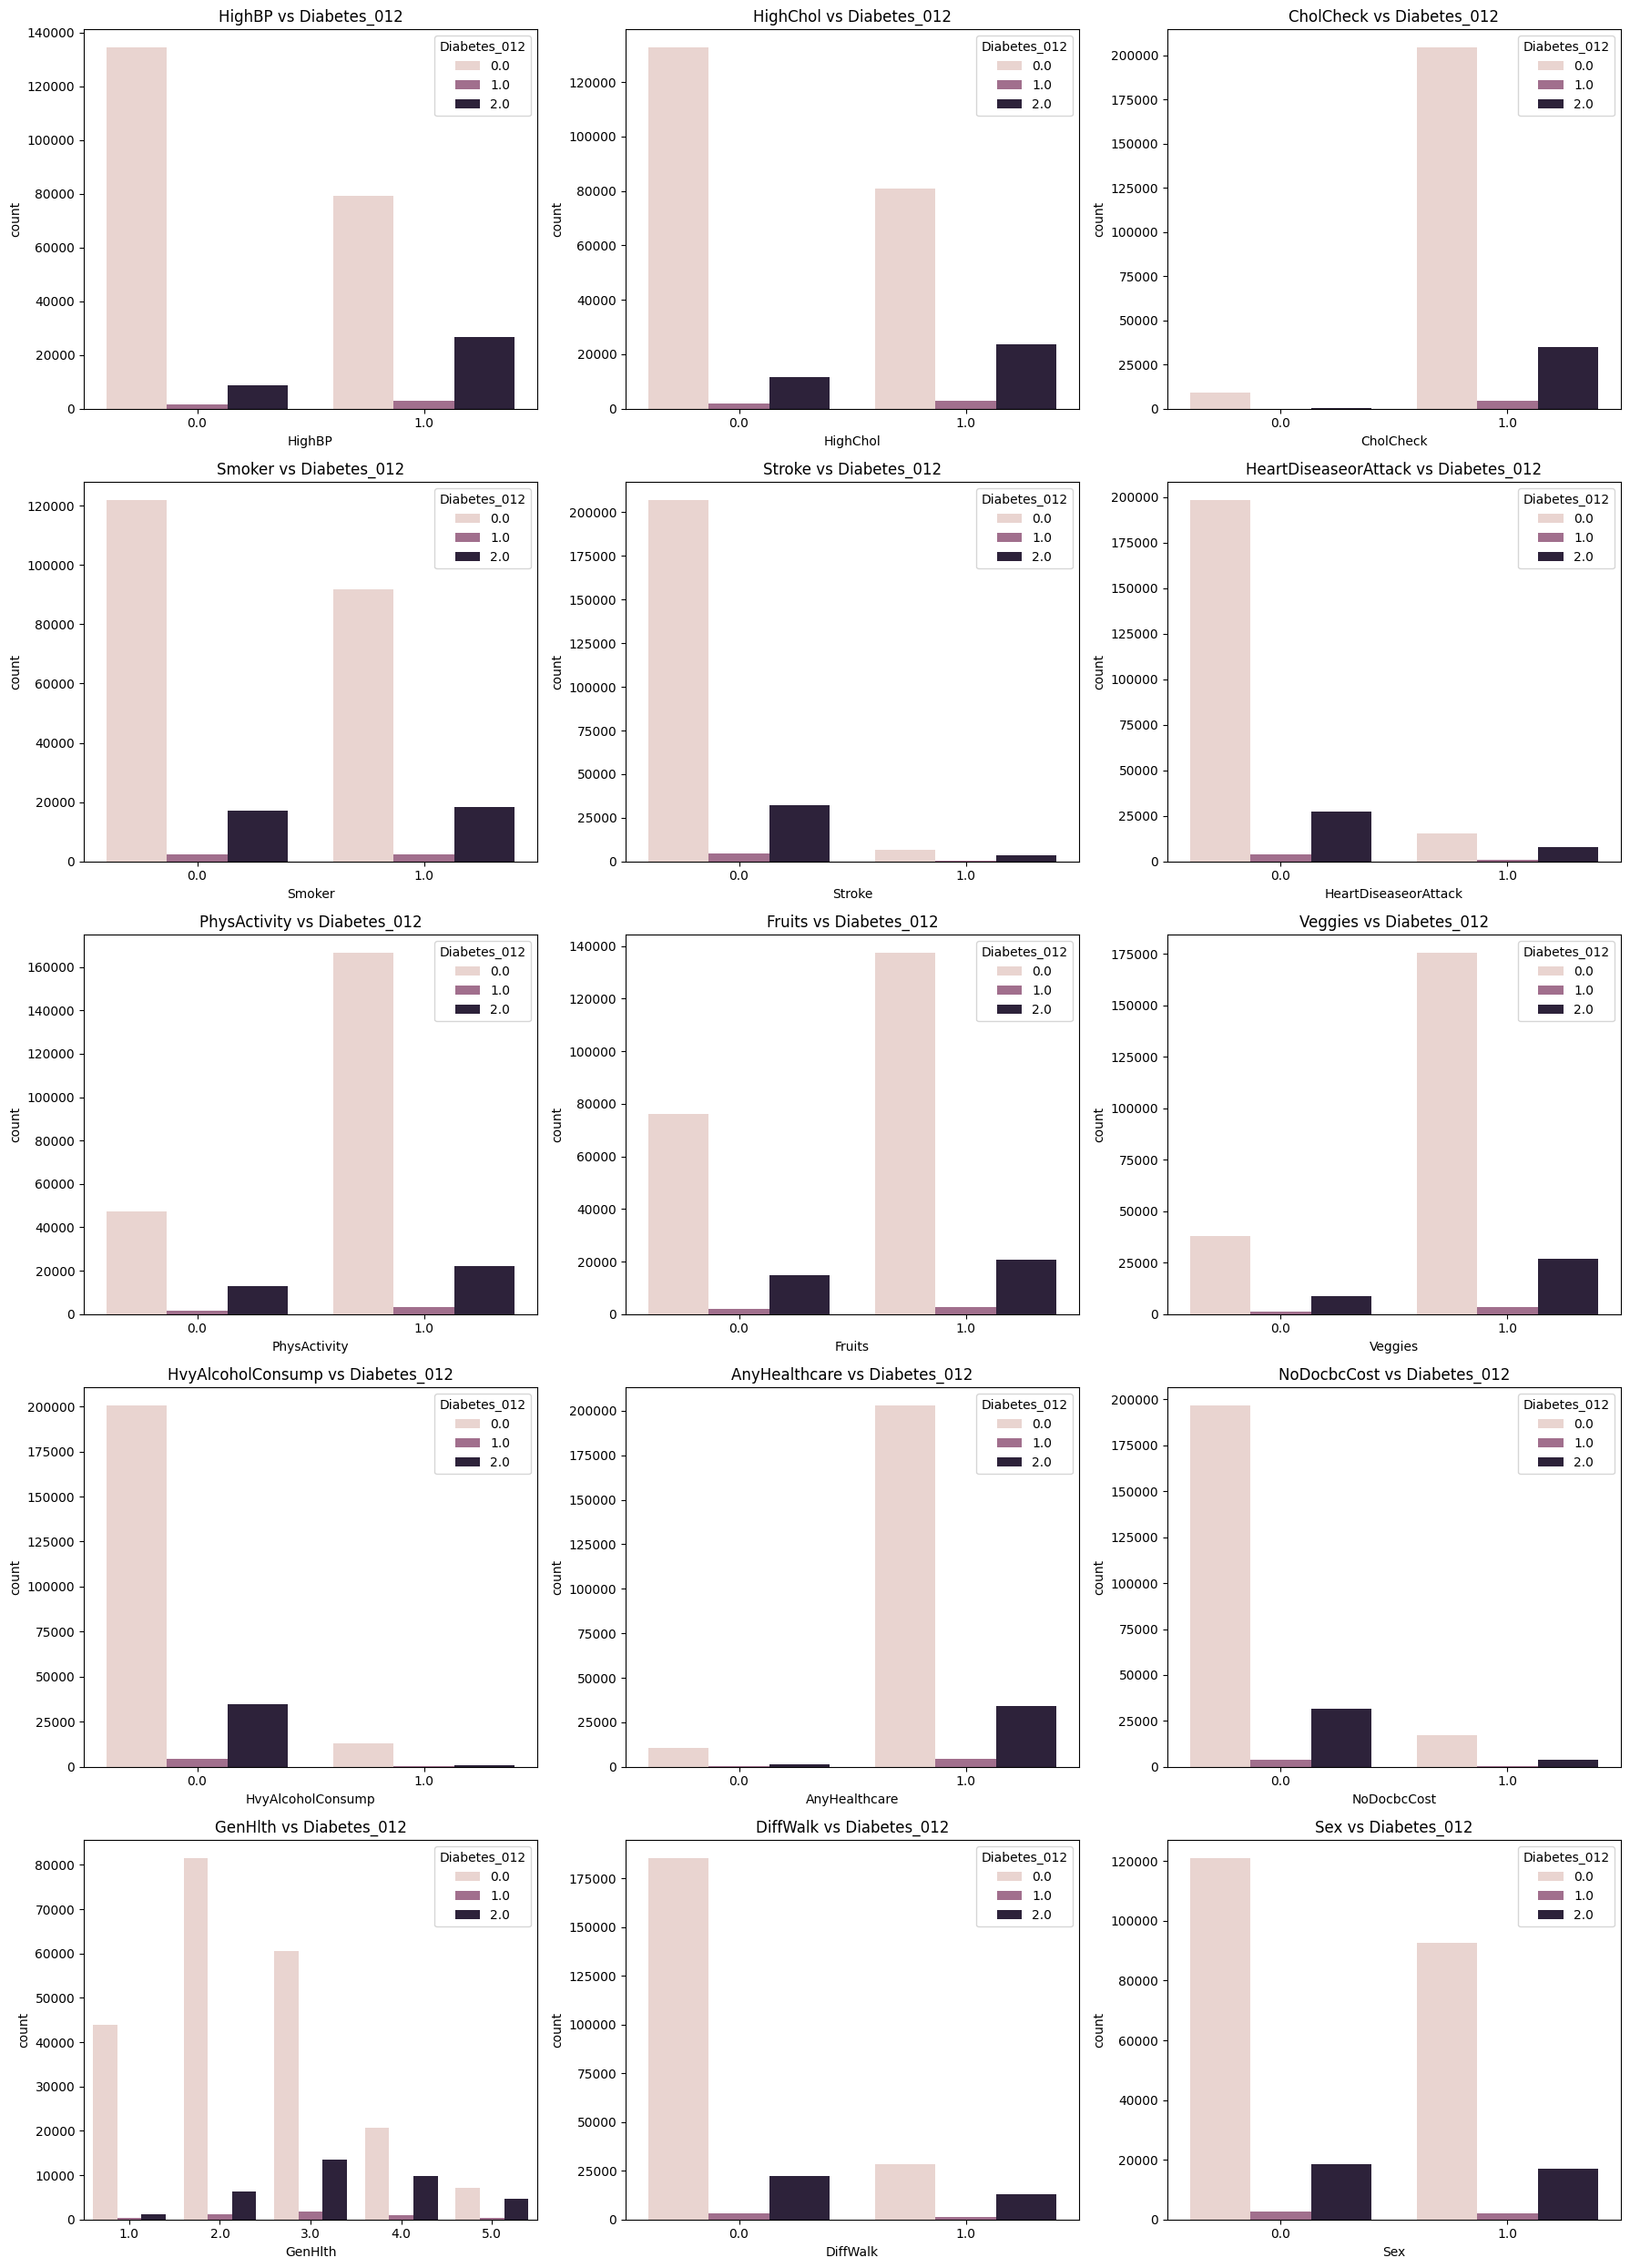

In [26]:
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=col, hue='Diabetes_012', data=df)
    plt.title(f"{col} vs Diabetes_012")

plt.tight_layout()
plt.show()

#### Señales claras:

- **HighBP, HighChol, HeartDiseaseorAttack, DiffWalk:**  
  ➤ Alta correlación con clases 1 y 2. Indican deterioro en la salud general.

- **PhysActivity:**  
  ➤ Menor actividad física asociada a mayor prevalencia de diabetes.

- **HvyAlcoholConsump:**  
  ➤ Curiosamente muestra menos casos de diabetes. Podría reflejar un **sesgo posterior al diagnóstico**.

- **Fruits y Veggies:**  
  ➤ Menor consumo se asocia con más casos de diabetes.

- **Stroke y NoDocbcCost:**  
  ➤ También se relacionan con mayor presencia de diabetes.

#### Menos relevantes visualmente:

- **Smoker, AnyHealthcare, Sex:**  
  ➤ No muestran diferencias claras entre clases. Su efecto podría ser menor o indirecto.

### Matriz de correlación

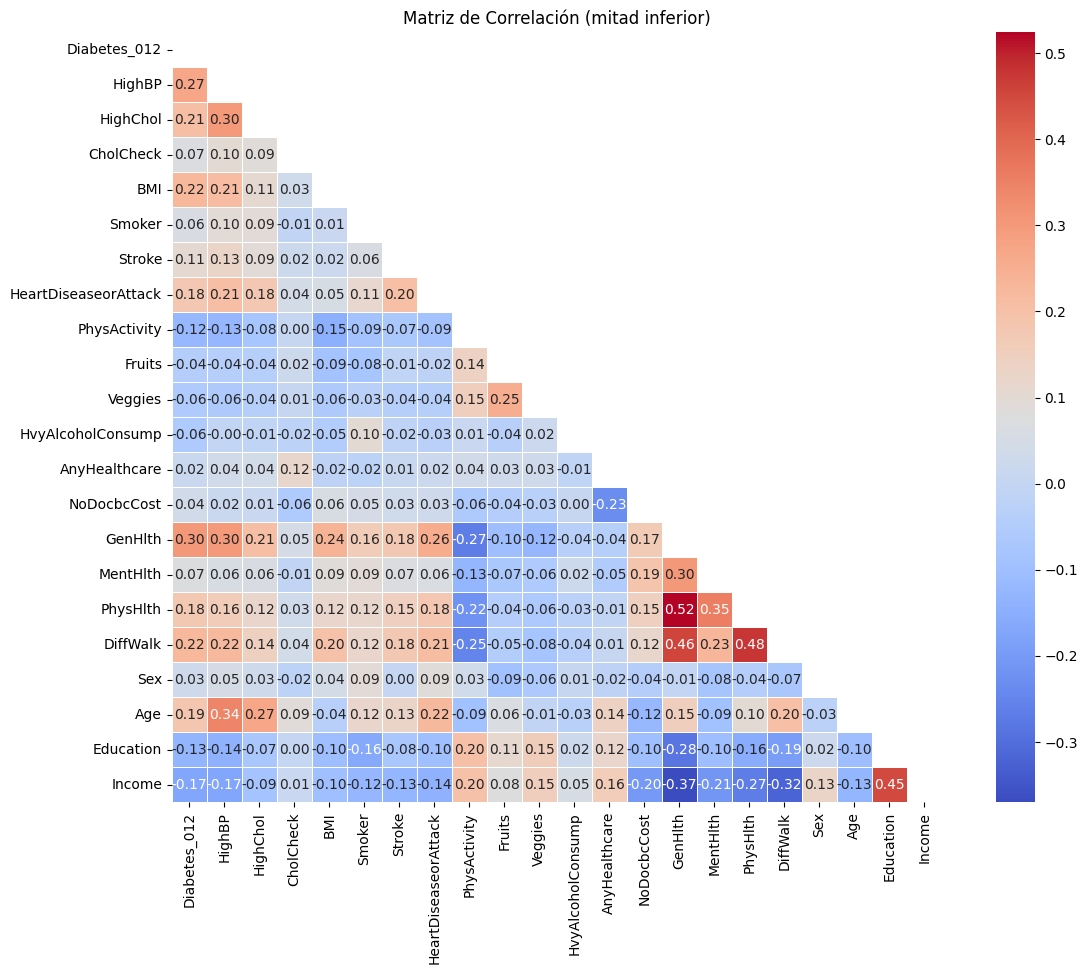

Correlación de cada variable con 'Diabetes_012':
GenHlth                 0.30
HighBP                  0.27
BMI                     0.22
DiffWalk                0.22
HighChol                0.21
Age                     0.19
HeartDiseaseorAttack    0.18
PhysHlth                0.18
Stroke                  0.11
MentHlth                0.07
CholCheck               0.07
Smoker                  0.06
NoDocbcCost             0.04
Sex                     0.03
AnyHealthcare           0.02
Fruits                 -0.04
HvyAlcoholConsump      -0.06
Veggies                -0.06
PhysActivity           -0.12
Education              -0.13
Income                 -0.17
Name: Diabetes_012, dtype: float64


In [32]:
import numpy as np

# IMPRIMIMOS LA MATRIZ DE CORRELACIÓN
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, square=True)
plt.title('Matriz de Correlación (mitad inferior)')
plt.show()

# IMPRIMIMOS LA CORRELACIÓN DE CADA VARIABLE CON LA VARIABLE TARGET
corr = df.corr(numeric_only=True)
corr_diabetes = corr['Diabetes_012'].drop('Diabetes_012')
corr_diabetes_sorted = corr_diabetes.sort_values(ascending=False)
print("Correlación de cada variable con 'Diabetes_012':")
print(corr_diabetes_sorted.round(2))


#### Variables con Mayor Correlación Positiva
1. **GenHlth (0.285)**
   - La salud general del paciente es el indicador más fuertemente correlacionado
   - Peor salud general se asocia con mayor probabilidad de diabetes

2. **HighBP (0.262)**
   - La presión arterial alta muestra una correlación importante
   - Confirma su conocida asociación con la diabetes

3. **BMI (0.212)**
   - El índice de masa corporal elevado está correlacionado con diabetes
   - Reafirma la relación entre sobrepeso/obesidad y riesgo de diabetes

4. **DiffWalk (0.211)**
   - La dificultad para caminar tiene una correlación similar al BMI
   - Sugiere relación entre problemas de movilidad y diabetes

5. **HighChol (0.203)**
   - El colesterol alto muestra correlación significativa con diabetes

#### Variables con Correlación Negativa
1. **Income (-0.17)**
   - Ingresos más bajos se asocian con mayor prevalencia de diabetes

2. **Education (-0.13)**
   - Menor nivel educativo se relaciona con mayor probabilidad de diabetes

3. **PhysActivity (-0.12)**
   - La falta de actividad física está asociada con mayor riesgo de diabetes

4. **HvyAlcoholConsump (-0.067)**
   - Sorprendentemente, el consumo elevado de alcohol muestra correlación negativa

#### Correlaciones Fuertes (|corr| ≥ 0.45)
1. **GenHlth y PhysHlth (0.517)**
   - La salud general y la salud física están fuertemente correlacionadas
   - Podría indicar multicolinealidad

2. **PhysHlth y DiffWalk (0.467)**
   - Problemas de salud física están correlacionados con dificultad para caminar

### Correlaciones Moderadas
1. **Income y Education (0.419)**
   - Nivel educativo y nivel de ingresos muestran correlación significativa

2. **HighBP y HighChol (0.284)**
   - Presión arterial alta y colesterol alto tienen correlación moderada